In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CSV Data

In [2]:
#read excel
df = pd.read_csv('comments.csv')
df.head()

,Unnamed: 0,0
0,0,THE WHITE WOMEN ARE COMING
1,1,FALL CAN OFFICIALLY START NOW
2,2,They droppin an album
3,3,AHHHH ITS OFFICIALLY GILMORE GIRLS SEASONNNN
4,4,OH MY GOURD. I AM SO HAPPY. COUNTING DOWN THE ...


In [3]:
# Check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2771 non-null   int64 
 1   0           2771 non-null   object
dtypes: int64(1), object(1)
memory usage: 43.4+ KB


In [4]:
# Display header of dataframe
df.head()

,Unnamed: 0,0
0,0,THE WHITE WOMEN ARE COMING
1,1,FALL CAN OFFICIALLY START NOW
2,2,They droppin an album
3,3,AHHHH ITS OFFICIALLY GILMORE GIRLS SEASONNNN
4,4,OH MY GOURD. I AM SO HAPPY. COUNTING DOWN THE ...


In [5]:
#save only text column which is last column 
df = df.iloc[:, -1:]
df.head()

,0
0,THE WHITE WOMEN ARE COMING
1,FALL CAN OFFICIALLY START NOW
2,They droppin an album
3,AHHHH ITS OFFICIALLY GILMORE GIRLS SEASONNNN
4,OH MY GOURD. I AM SO HAPPY. COUNTING DOWN THE ...


In [6]:
#rename column as text
df.columns = ['text']
df.head()

,text
0,THE WHITE WOMEN ARE COMING
1,FALL CAN OFFICIALLY START NOW
2,They droppin an album
3,AHHHH ITS OFFICIALLY GILMORE GIRLS SEASONNNN
4,OH MY GOURD. I AM SO HAPPY. COUNTING DOWN THE ...


In [7]:
import re
#clean the text column
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removing @mentions
    text = re.sub(r'#', '', text)  # Removing '#' hash tag
    text = re.sub(r'RT[\s]+', '', text)  # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Removing hyperlink
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Removing punctuation
    text = re.sub(r'\s+', ' ', text)  # Removing extra whitespace
    text = text.lower()  # Converting to lowercase
    return text

In [8]:
#apply clean_text function to text column
df['text'].apply(clean_text)


0                              the white women are coming
1                              fall can officially stanow
2                                   they droppin an album
3            ahhhh its officially gilmore girls seasonnnn
4       oh my gourd i am so happy counting down the se...
                              ...                        
2766                                               colee 
2767                                                 psl 
2768                                                     
2769                                                     
2770           ohh the moment we ve all been waiting for 
Name: text, Length: 2771, dtype: object

# sentiment analysis

In [9]:
df.shape

(2771, 1)

In [10]:
import textblob
# classifying tweets as positive, negative and neutral
def get_sentiment(text):
    sentiment = textblob.TextBlob(text).sentiment.polarity
    if sentiment < 0:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [11]:
df['Sentiment'] = df['text'].apply(get_sentiment)

In [12]:
#store positive in one csv file and negative in another csv file    
df_positive = df[df['Sentiment'] == 'Positive']
df_negative = df[df['Sentiment'] == 'Negative']
df_neutarl = df[df['Sentiment'] == 'Neutral']



In [13]:
#print no of positive, negative and neutral tweets
print("Positive tweets percentage: {} %".format(100*len(df_positive)/len(df)))
print("Negative tweets percentage: {} %".format(100*len(df_negative)/len(df)))
print("Neutral tweets percentage: {} %".format(100*len(df_neutarl)/len(df)))

Positive tweets percentage: 17.755322988090942 %
Negative tweets percentage: 5.629736557199567 %
Neutral tweets percentage: 76.6149404547095 %


In [14]:
#plotly
import plotly.express as px
df['Sentiment'].value_counts()
fig = px.pie(df, names='Sentiment', title='Sentiment Analysis Result')
fig.show()
    

In [15]:
#histogram
#visualize the sentiment of the text using plotly
fig = px.histogram(df , x="Sentiment", color="Sentiment", barmode="group")
fig.show( )

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    


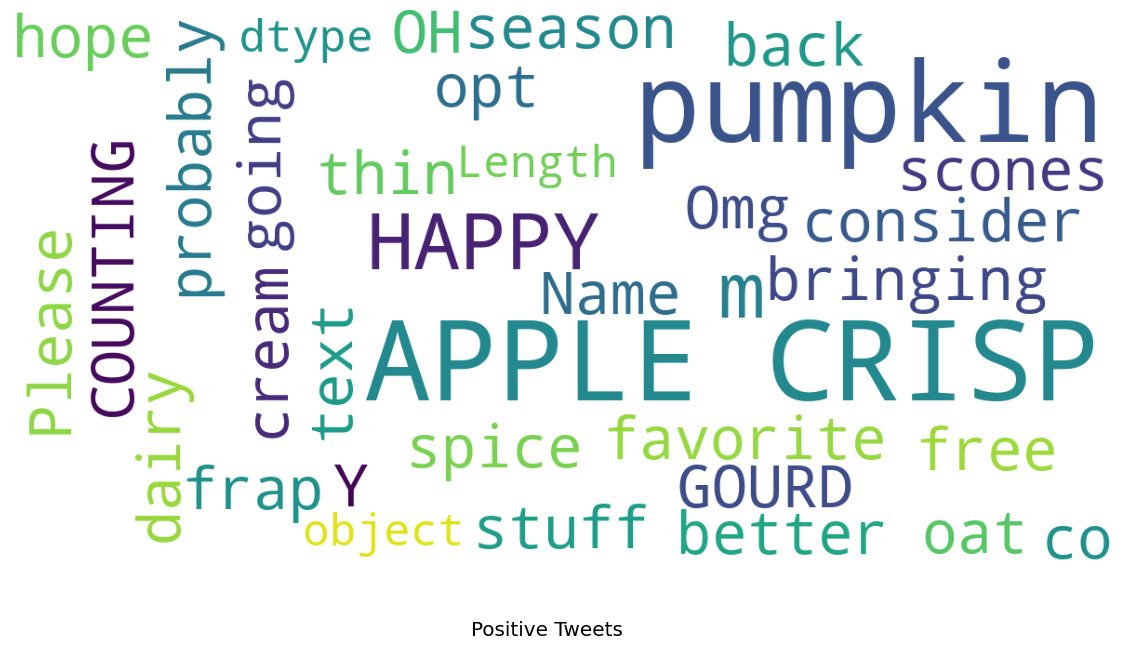

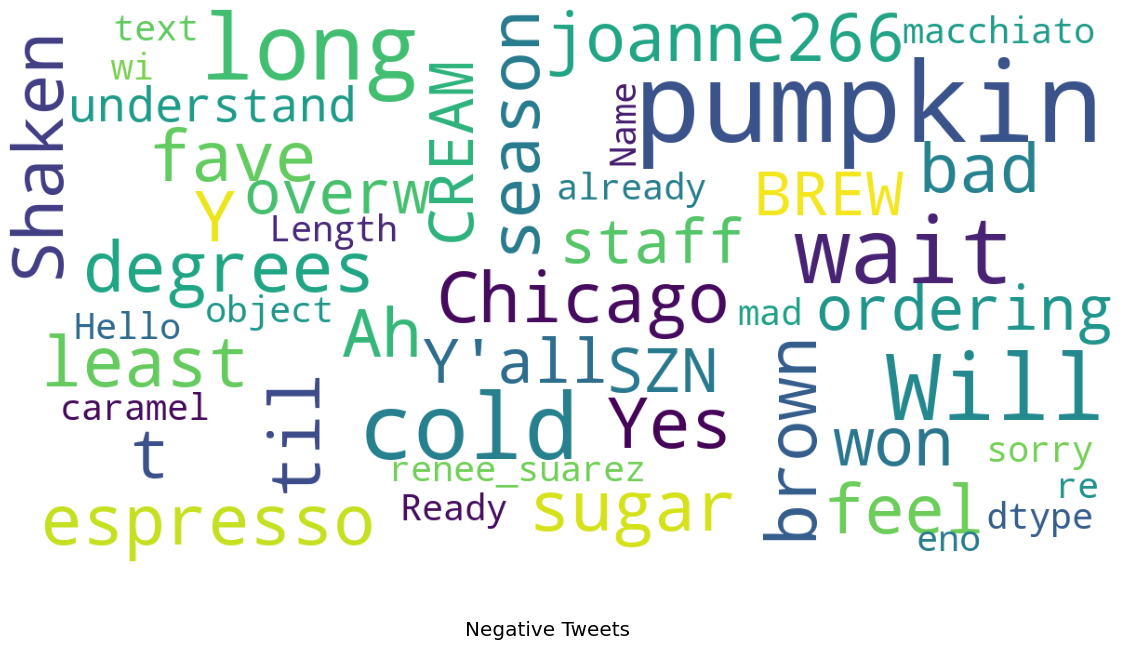

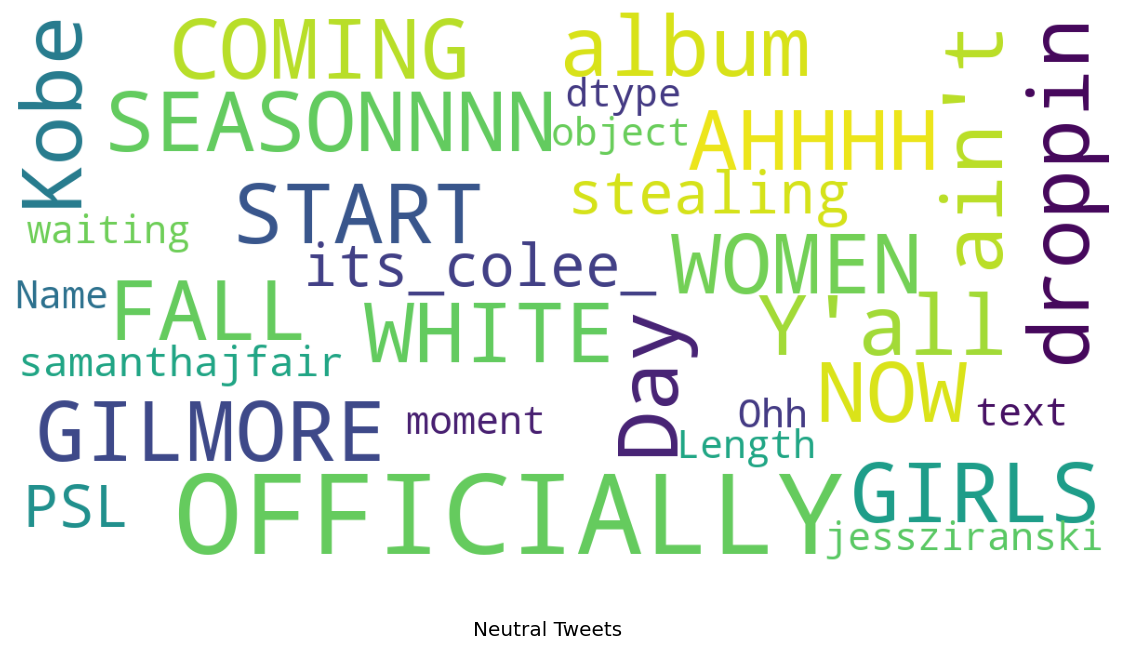

In [17]:
#positive word cloud
show_wordcloud(df_positive['text'], title = 'Positive Tweets')

#negative word cloud
show_wordcloud(df_negative['text'], title = 'Negative Tweets')

#neutral word cloud
show_wordcloud(df_neutarl['text'], title = 'Neutral Tweets')

# Machine Learning

In [18]:
# logisitic regression
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text

cv = CountVectorizer(max_features=1000)

X = cv.fit_transform(df['text']).toarray()

y = df['Sentiment']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)

classifier.fit(X_train,y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)

#PREDICT ACCURACY
from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_test,y_pred))

    

Accuracy:  0.9099099099099099


In [19]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)

print(cm)

[[ 20  13   7]
 [  2 415   4]
 [  0  24  70]]


Text(69.0, 0.5, 'Truth')

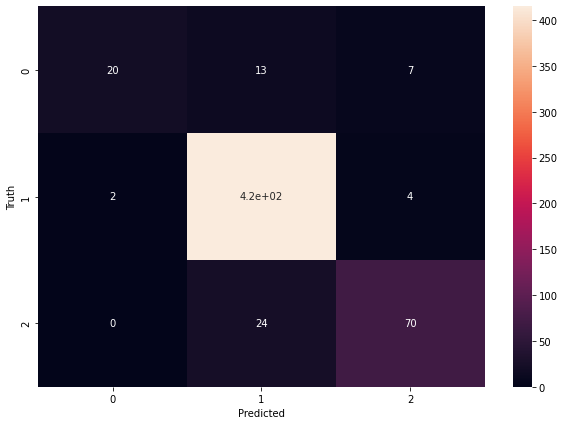

In [20]:
#visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(10,7))

sns.heatmap(cm,annot=True)

plt.xlabel('Predicted')

plt.ylabel('Truth')

#save model
    

In [21]:
# decion tree
from sklearn.tree import DecisionTreeClassifier as decision

classifier = decision(criterion='entropy',random_state=0)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.8864864864864865


In [22]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)

print(cm)



[[ 23  12   5]
 [  5 407   9]
 [  3  29  62]]


Text(69.0, 0.5, 'Truth')

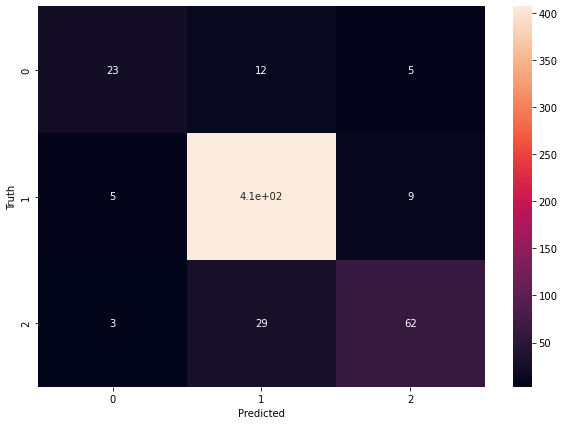

In [23]:
#visualize confusion matrix

import seaborn as sns

plt.figure(figsize=(10,7))

sns.heatmap(cm,annot=True)

plt.xlabel('Predicted')

plt.ylabel('Truth')


In [24]:
#svm

from sklearn.svm import SVC

classifier = SVC(kernel='linear',random_state=0)

classifier.fit(X_train,y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)

#accuracy

print("Accuracy: ",accuracy_score(y_test,y_pred))

    

Accuracy:  0.9351351351351351


In [25]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)

print(cm)



[[ 26  10   4]
 [  2 415   4]
 [  1  15  78]]


Text(69.0, 0.5, 'Truth')

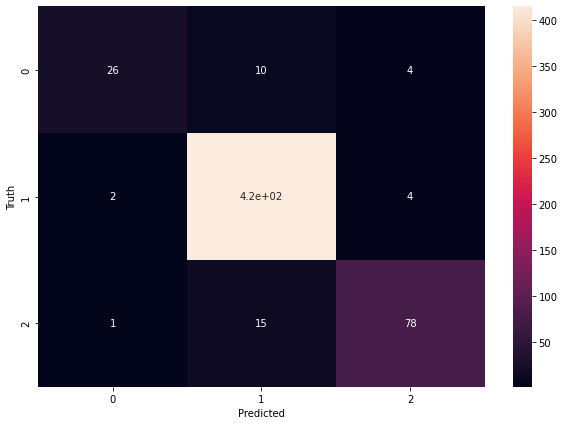

In [26]:
#visualize confusion matrix

import seaborn as sns

plt.figure(figsize=(10,7))

sns.heatmap(cm,annot=True)

plt.xlabel('Predicted')

plt.ylabel('Truth')

# Comparison Model

In [27]:
# plot accuracy of all models using plotly

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(

    x=['Logistic Regression', 'Decision tree', 'SVM'],

    y=[0.90, 0.88, 0.93],

    name='Accuracy',

    marker_color='indianred'

))

    
            

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Model', 'Accuracy'],line_color='darkslategray',fill_color='lightskyblue'),

                    cells=dict(values=[['Logistic Regression', 'Decision tree', 'SVM'], [0.90, 0.88, 0.93]],line_color='darkslategray',fill_color='lightcyan'))

                        ])

fig.show()

    
